In [1]:
import pandas as pd

# Load the data
data_df = pd.read_csv('electric-car.csv')

# Print shape
print('Shape:', data_df.shape) # (57, 2)

# First five rows
data_df.head()

Shape: (57, 2)


,Temperature [°F],Energy Consumption [Wh/mil]
0,-15,460
1,-12,398
2,-8,460
3,-7,540
4,-6,347


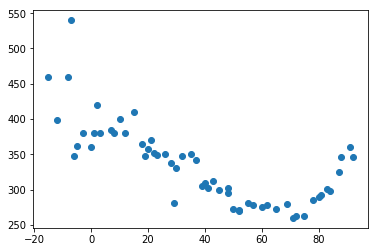

In [2]:
x = data_df.iloc[:, 0].values # Temperatures
y = data_df.iloc[:, 1].values # Consumption

# Plot data
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

In [5]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [6]:
pf_obj = PolynomialFeatures(degree=2)

# Create the polynomial features
X2 = pf_obj.fit_transform(x[:, np.newaxis])

print('Shape:', X2.shape) # (57, 3)

Shape: (57, 3)


In [9]:
feature_names = pf_obj.get_feature_names()

print('Features:', feature_names)
# Prints: ['1', 'x0', 'x0^2']

Features: ['1', 'x0', 'x0^2']


In [22]:
pf_obj = PolynomialFeatures(degree=5, include_bias=False)

# Create the polynomial features
X2 = pf_obj.fit_transform(x[:, np.newaxis])

# Get feature names
feature_names = pf_obj.get_feature_names()

print('Features:', feature_names)

Features: ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5']


In [23]:
from sklearn.linear_model import LinearRegression

# Create linear regression
linreg = LinearRegression()

# Fit it
linreg.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
x_values = np.linspace(min(x), max(x), num=100)
X_values2 = pf_obj.transform(x_values[:, np.newaxis])

In [25]:
X_values2 = np.c_[x_values, x_values**2, x_values**3, x_values**4, x_values**5]

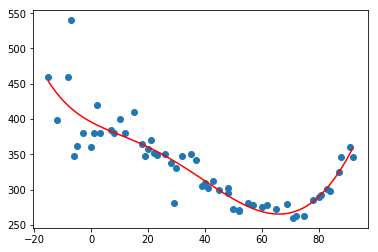

In [26]:
y_values = linreg.predict(X_values2)

# Plot predictions
plt.scatter(x, y)
plt.plot(x_values, y_values, color='red')
plt.show()

## Splitting Data

In [27]:
import pandas as pd

# Load the data
data_df = pd.read_csv('electric-car.csv')

# First five rows
data_df.head()

,Temperature [°F],Energy Consumption [Wh/mil]
0,-15,460
1,-12,398
2,-8,460
3,-7,540
4,-6,347


In [38]:
import numpy as np

# Generate a list of indexes
n = len(data_df)
indexes = np.arange(n)
np.random.seed(0)
np.random.shuffle(indexes)

In [39]:
split_idx = int(n*0.7)
train_idx = indexes[:split_idx]
test_idx = indexes[split_idx:]

In [40]:
test_idx

array([38,  1, 12, 43, 24,  6, 23, 36, 21, 19,  9, 39, 52,  3,  0, 53, 47,
       44])

In [41]:
x = data_df.iloc[:, 0].values # Temperatures
y = data_df.iloc[:, 1].values # Consumption

# Split data
x_tr, y_tr = x[train_idx], y[train_idx]
x_te, y_te = x[test_idx], y[test_idx]

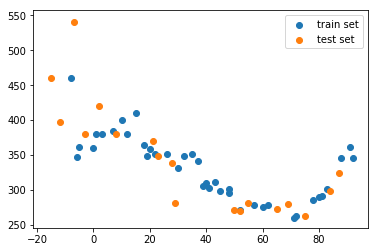

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot data points
plt.scatter(x_tr, y_tr, label='train set')
plt.scatter(x_te, y_te, label='test set')
plt.legend()
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

# Split data
x_tr, x_te, y_tr, y_te = train_test_split(
    x, y, train_size=0.7, test_size=0.3, random_state=0)

In [44]:
from sklearn.metrics import mean_squared_error as mse

# Polynomial regressions of degree 5 and 10
coef5 = np.polyfit(x_tr, y_tr, deg=5)
coef10 = np.polyfit(x_tr, y_tr, deg=10)

# Evaluate performance
y_pred5_tr = np.polyval(coef5, x_tr)
y_pred5_te = np.polyval(coef5, x_te)

print('Degree 5 MSE: {:.0f} (train) vs {:.0f} (test)'.format(
    mse(y_tr, y_pred5_tr),
    mse(y_te, y_pred5_te)
))
# Degree 5 MSE: 719 (train) vs 651 (test)

y_pred10_tr = np.polyval(coef10, x_tr)
y_pred10_te = np.polyval(coef10, x_te)

print('Degree 10 MSE: {:.0f} (train) vs {:.0f} (test)'.format(
    mse(y_tr, y_pred10_tr),
    mse(y_te, y_pred10_te)
))

Degree 5 MSE: 719 (train) vs 651 (test)
Degree 10 MSE: 707 (train) vs 1218 (test)


## Categorical Variables

In [45]:
import pandas as pd

# Load the data
data_df = pd.read_csv('bike-sharing-cat.csv')

# First five rows
data_df.head()

,temp,weekday,casual
0,0.344,6,331
1,0.363,0,131
2,0.196,1,120
3,0.200,2,108
4,0.227,3,82


In [46]:
X = data_df[['temp']].values
y = data_df.casual.values

# Fit a linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y) # 0.295

0.29525001840042775

In [47]:
X = data_df[['temp', 'weekday']].values
y = data_df.casual.values

# Fit a linear regression
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y) # 0.299

0.29885880814092858

In [48]:
pd.get_dummies(data_df, columns=['weekday']).head()

,temp,casual,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.344,331,0,0,0,0,0,0,1
1,0.363,131,1,0,0,0,0,0,0
2,0.196,120,0,1,0,0,0,0,0
3,0.200,108,0,0,1,0,0,0,0
4,0.227,82,0,0,0,1,0,0,0


In [49]:
encoded_df = pd.get_dummies(data_df, columns=['weekday'])

# Create X/y data
X = encoded_df.drop(['casual'], axis=1).values
y = encoded_df.casual.values

# Fit a linear regression
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y) # 0.595

0.59478755740087963